This code explores digit classification using the MNIST dataset using Logistic REgression, Logistic regression + pca and neural network 
The CSV format of the dataset is downloaded from Kaggle - source: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download

In [2]:
import numpy as np
import pandas as pd

#Extracting training and testing data
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

The mnist_train.csv file contains the 60,000 training examples and labels. The mnist_test.csv contains 10,000 
test examples and labels. Each row consists of 785 values: the first value is
 the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

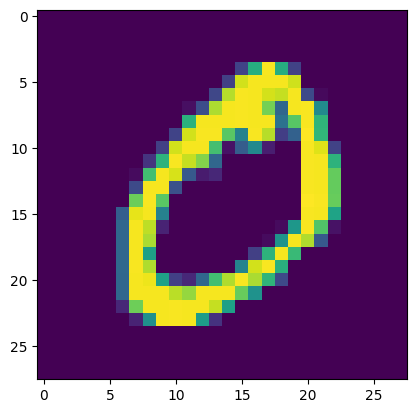

In [3]:
#Displaying one of the digits
import matplotlib.pyplot as plt
plt.imshow(train_data.iloc[1,1:].values.reshape(28,28)) 

In [4]:
#Dimensions of training and testing sets
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [5]:
#Splitting data into training and testing sets

X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

### 1. Using Logistic Regression 

In [6]:
#Training and testing

from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression()

#Scaling for convergence
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

lr.fit(X_train_scaler, y_train)
y_pred = lr.predict(X_test_scaler)
print('accuracy score',accuracy_score(y_test, y_pred))

accuracy score 0.9246


### 2. Logistic Regression using PCA

In [7]:
#Source :https://www.kaggle.com/code/yugalchambhare/pca-mnist
from sklearn.decomposition import PCA
pca = PCA(n_components = 400)
xtrain_pca = pca.fit_transform(X_train_scaler)
xtest_pca = pca.transform(X_test_scaler)
lr.fit(xtrain_pca, y_train)
ypred_pca = lr.predict(xtest_pca)
print( 'accuracy score',accuracy_score(y_test, ypred_pca))

accuracy score 0.9256


A slight increase in accuracy is observed after applying PCA

### 3. Using Neural Network

In [8]:
#https://www.kaggle.com/code/jeiols/digit-classification

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

#Normalizing
x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

#Creating the neural network
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape = (784,)),
    Dense(120, activation = 'relu', name = 'L1'),
    Dense(120, activation = 'relu', name = 'L2'),
    Dense(10, activation = 'linear', name = 'L3')
    ], name = 'Digit'
)

print(x_train.shape, y_train.shape)
model.summary()

(60000, 784) (60000,)
Model: "Digit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               94200     
                                                                 
 L2 (Dense)                  (None, 120)               14520     
                                                                 
 L3 (Dense)                  (None, 10)                1210      
                                                                 
Total params: 109,930
Trainable params: 109,930
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Displaying the number of weights
[layer1, layer2, layer3] = model.layers
w1, b1 = layer1.get_weights()
w2, b2 = layer2.get_weights()
w3, b3 = layer3.get_weights()

print(w1.shape, b1.shape)
print(w2.shape, b2.shape)
print(w3.shape, b3.shape)

(784, 120) (120,)
(120, 120) (120,)
(120, 10) (10,)


In [10]:
#Training
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history1 = model.fit(
    x_train,y_train,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3369 - accuracy: 0.9044
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1419 - accuracy: 0.9573
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0986 - accuracy: 0.9694
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9771
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0592 - accuracy: 0.9816
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9852
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0382 - accuracy: 0.9879
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9897
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

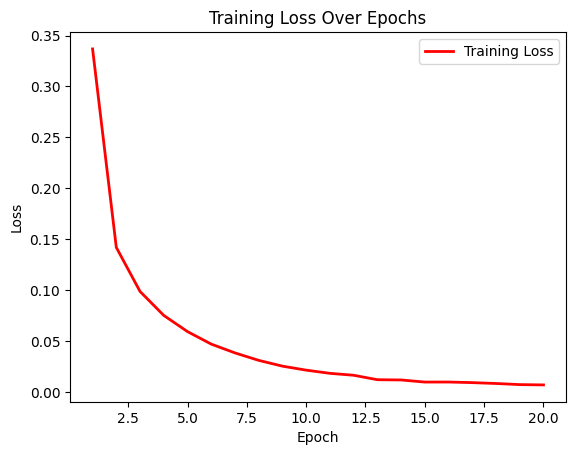

In [11]:
loss = history1.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'red', label='Training Loss', linewidth=2)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 88ms/step
Predicted Value: 4
Actual value: 4


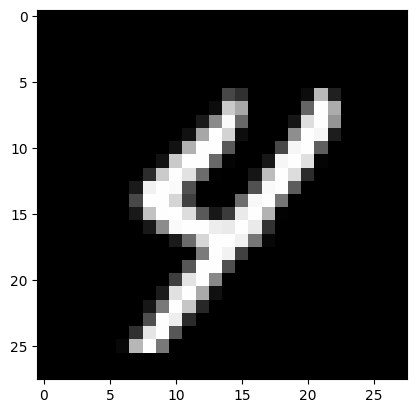

In [12]:
#Testing the model on a random training sample
def show_image(x):
    current_image = x.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='Nearest')
    plt.show()
    
def make_predictions(x, y):
    predictions = model.predict(x.reshape(1,784))
    print(f"Predicted Value: {np.argmax(predictions)}")
    print(f"Actual value: {y}")
    show_image(x)
    
rindex = np.random.randint(20000)#Randomly selecting an index value
x = np.array(x_train.iloc[rindex])#Selecting a row from training set. Since iloc returns a series, it is converted to array.
y = np.array(y_train.iloc[rindex])

make_predictions(x, y)



In [13]:
#Testing accuracy on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1079 - accuracy: 0.9769
Test Loss: 0.10792377591133118
Test Accuracy: 0.9768999814987183


Accuracy is pretty high for NN classification.